# Showcasing Max. Temperature of Indian States Using Choropleth Map with the help of Python.

## Note 
The data for Maximum Temperature have been taken from various websites on internet and ChatGpt. I do not Clarify that the data is 100% accurate.

## Terminologies

### Creation of Chloropleth Map 
For creating chloropleth map of India I have taken help from the following GitHub Repository :
https://github.com/abhiwebdev202/choropleth-python-tutorial-India-map

### temp.csv
File contaning data of Max. Temperature of various States of India.

### [GeoJSON](https://geojson.org/)
An open standard format designed for representing simple geographical features, along with their non-spatial attributes.



In [2]:
# Importing various libraries
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [22]:
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For Graph to open in the Browser window
pio.renderers.default = 'browser'

In [4]:
# Files for the Creation OF MAP of India
india_states = json.load(open("states_india.geojson", "r"))

In [5]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [12]:
# Reading File Contaning Data to plot
df = pd.read_csv("temp.csv")
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

In [13]:
df.head()

,Rank,State or union territory,Max. Temp,id
0,1.0,Uttar Pradesh,49.0,9
1,2.0,Maharashtra,46.6,27
2,3.0,Bihar,48.0,10
3,4.0,West Bengal,46.0,19
4,5.0,Madhya Pradesh,47.0,23


<Axes: >

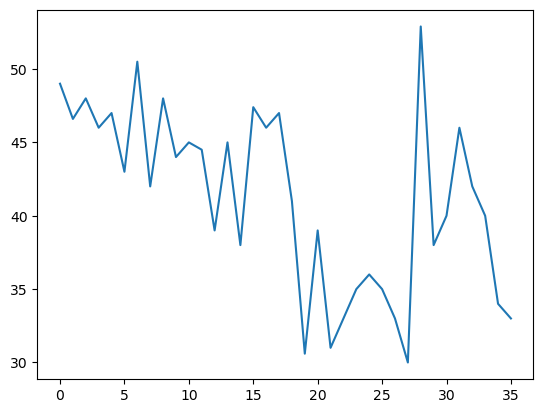

In [10]:
df["Max. Temp"].plot()

In [23]:
# Plotting chloropleth Map
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="Max. Temp",
    hover_name="State or union territory",
    hover_data=["Max. Temp"],
    title="Max. Temp in India during May",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

This is the .png file of the plot created to see the plot , run above cell and graph will be shown in your 
browser window.

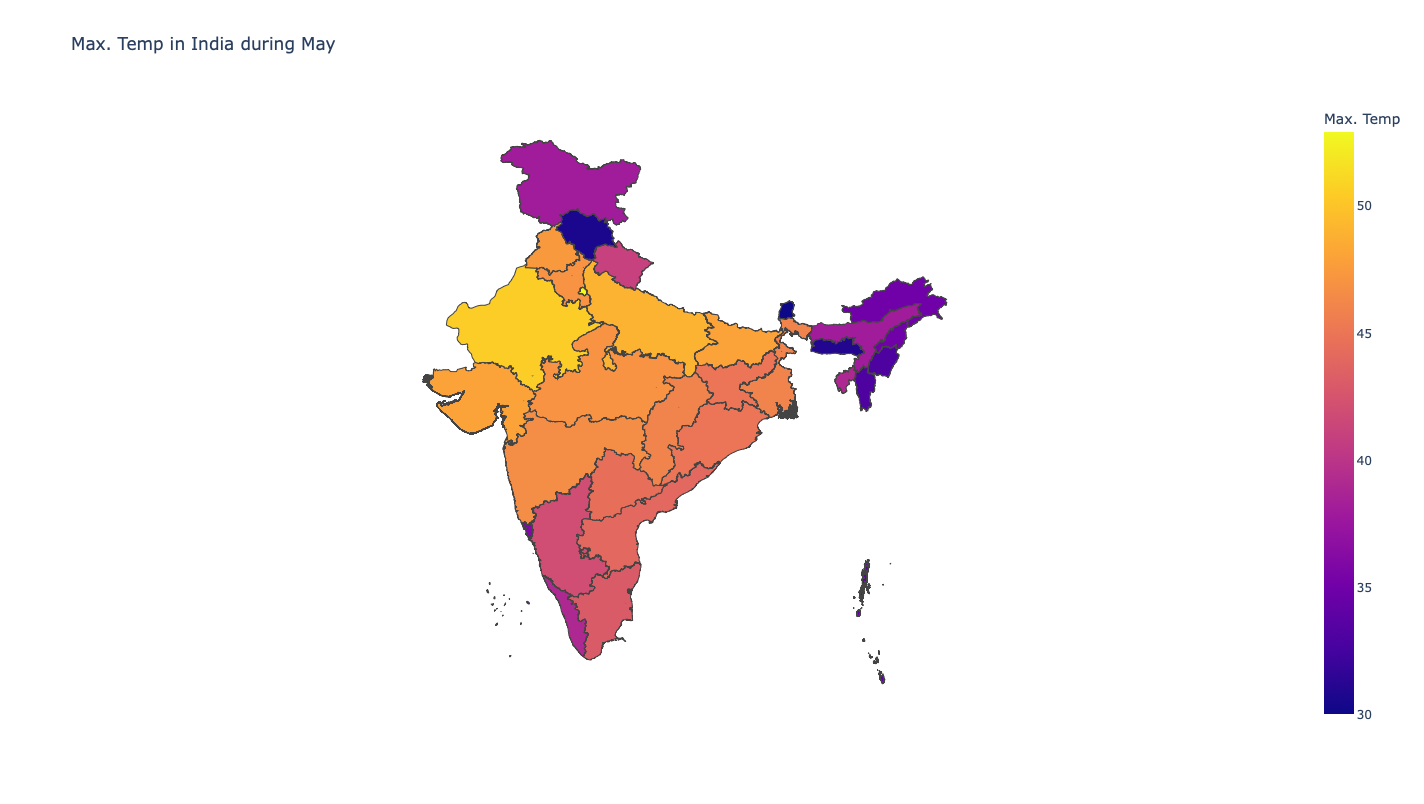

## References

- https://github.com/abhiwebdev202/choropleth-python-tutorial-India-map

- https://un-mapped.carto.com/tables/states_india/public/map

- https://plotly.com/python/choropleth-maps/

- https://plotly.com/python/colorscales/

- https://plotly.com/python/mapbox-county-choropleth/

- https://plotly.com/python/mapbox-layers/